In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('./MyDrive')
TRAIN_DIR = './MyDrive/My Drive/cats_and_dogs_small/train'
TEST_DIR = './MyDrive/My Drive/cats_and_dogs_small/test'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./MyDrive


In [0]:
from keras.models import load_model
model = load_model('./MyDrive/My Drive/cats_and_dogs_small_cnn.h5')

In [0]:
from keras.preprocessing import image
img = image.load_img('./MyDrive/My Drive/KakaoTalk_20200214_091440533.jpg',target_size=(220,220))

In [0]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/255.

In [0]:
import matplotlib.pyplot as plt

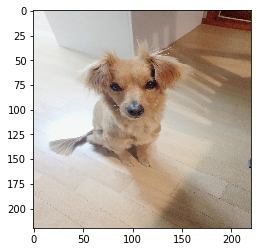

In [16]:
plt.imshow(img_tensor[0])
plt.show()

In [17]:
model.layers[:6]

In [18]:
model.layers[0].output

<tf.Tensor 'conv2d_8/Relu:0' shape=(?, 220, 220, 32) dtype=float32>

In [0]:
from keras import models

In [20]:
layer_outputs = [layer.output for layer in model.layers[:6]]
layer_outputs

[<tf.Tensor 'conv2d_8/Relu:0' shape=(?, 220, 220, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 110, 110, 32) dtype=float32>,
 <tf.Tensor 'conv2d_9/Relu:0' shape=(?, 110, 110, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 55, 55, 64) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 55, 55, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11/MaxPool:0' shape=(?, 28, 28, 128) dtype=float32>]

In [21]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model

In [22]:
activations = activation_model.predict(img_tensor)
activations

[array([[[[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.02357915],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.13022615],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.13033277],
          ...,
          [0.        , 0.        , 0.        , ..., 0.01112833,
           0.        , 0.05548176],
          [0.        , 0.        , 0.        , ..., 0.01321285,
           0.        , 0.0691959 ],
          [0.        , 0.        , 0.03698251, ..., 0.0053354 ,
           0.        , 0.14962925]],
 
         [[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
   

In [23]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 220, 220, 32)


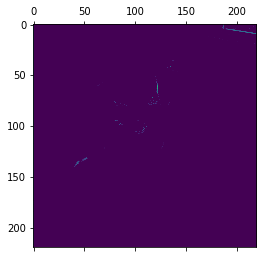

In [24]:
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')
plt.show()

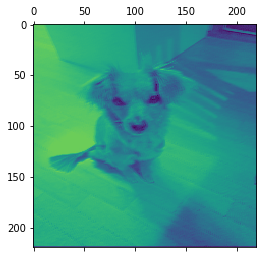

In [25]:
plt.matshow(first_layer_activation[0,:,:,16],cmap='viridis')
plt.show()

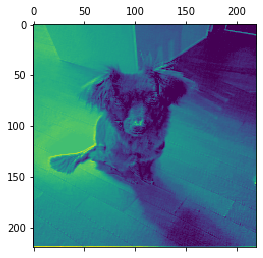

In [26]:
plt.matshow(first_layer_activation[0,:,:,8],cmap='viridis')
plt.show()

In [27]:
for layer in model.layers:
  print(layer.name)

conv2d_8
max_pooling2d_9
conv2d_9
max_pooling2d_10
conv2d_10
max_pooling2d_11
flatten_3
dropout_4
dense_5
dropout_5
dense_6


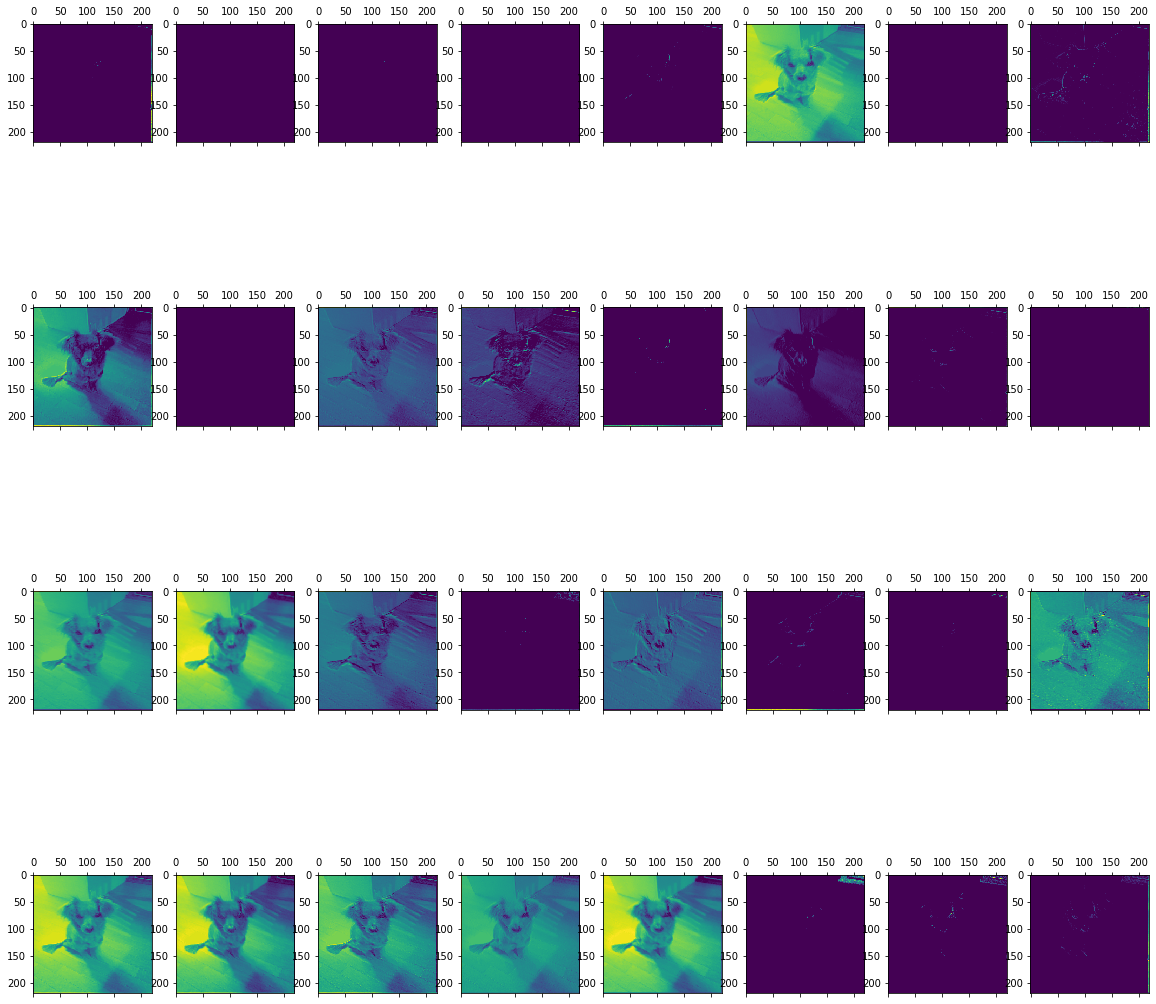

In [28]:
layer_out=activations[0]
fig = plt.figure(figsize=(20,20))
i=0
for i in range(32):
  subplot = fig.add_subplot(4,8,i+1)
  subplot.matshow(layer_out[0,:,:,i],cmap='viridis')
plt.show()

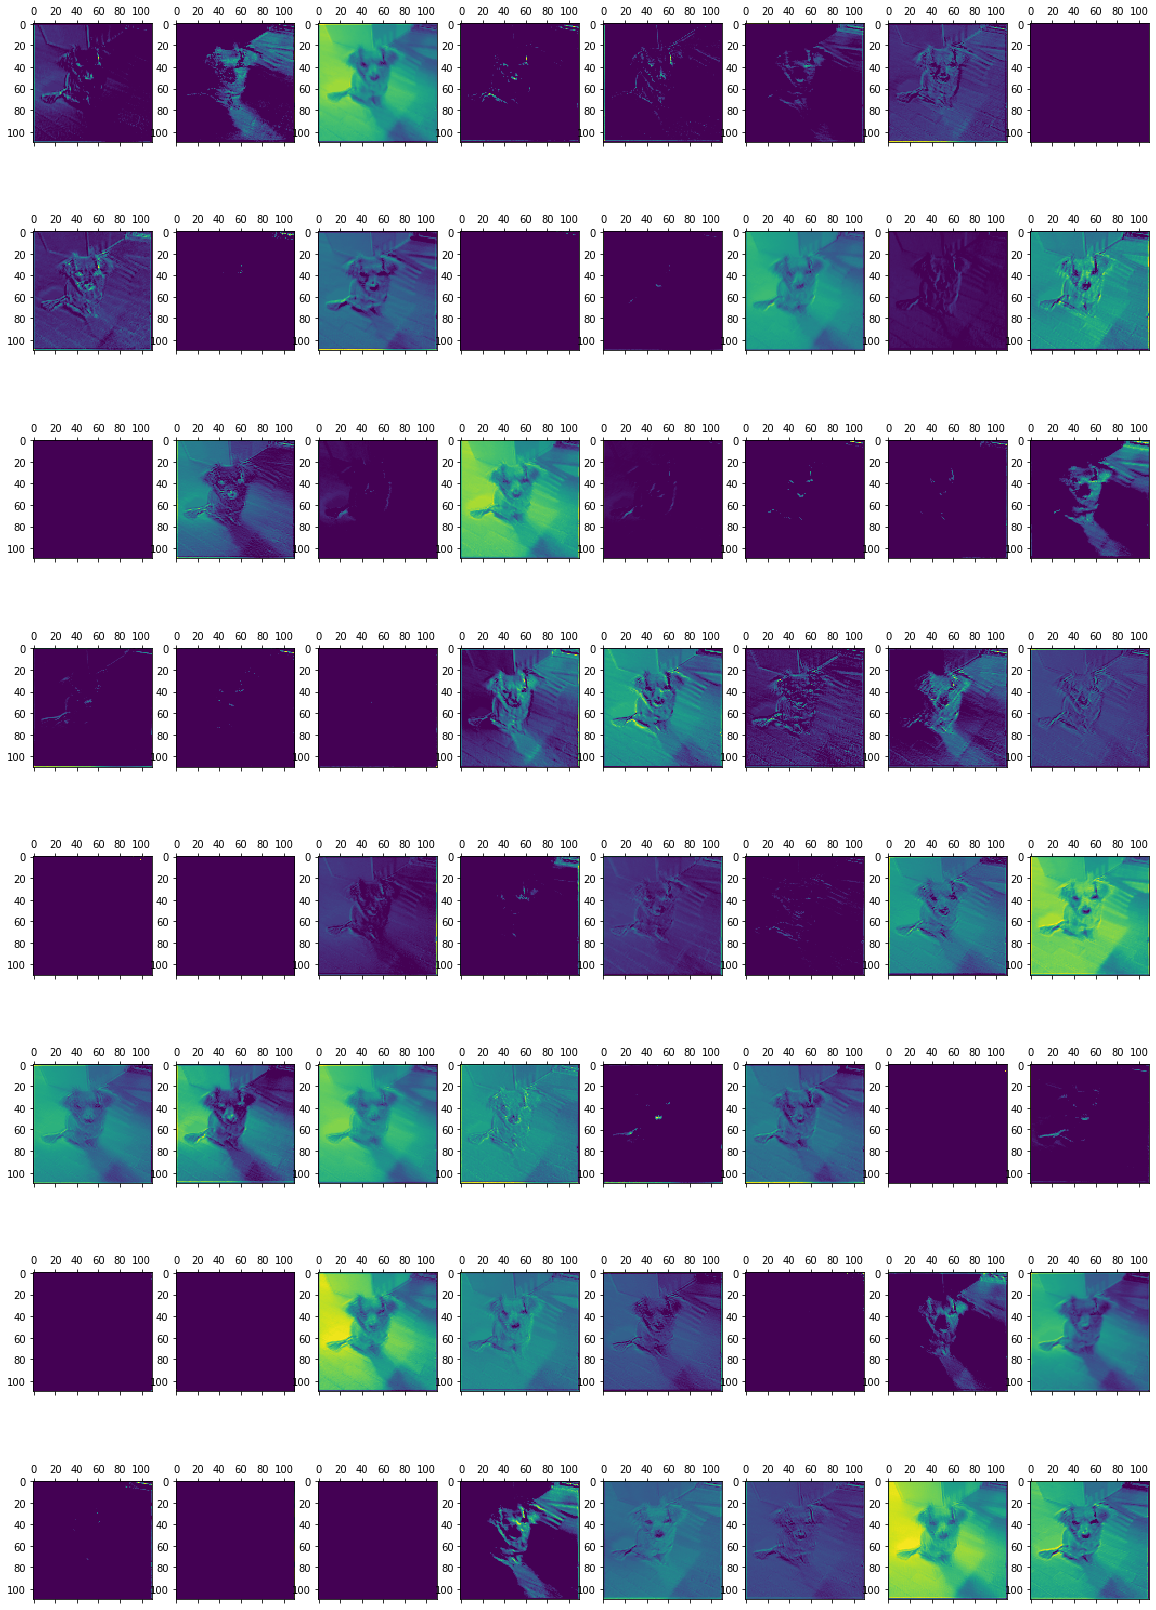

In [29]:
layer_out = activations[2]
fig = plt.figure(figsize=(20,30))
i=0
for i in range(64):
  subplot = fig.add_subplot(8,8,i+1)
  subplot.matshow(layer_out[0,:,:,i],cmap='viridis')
plt.show()

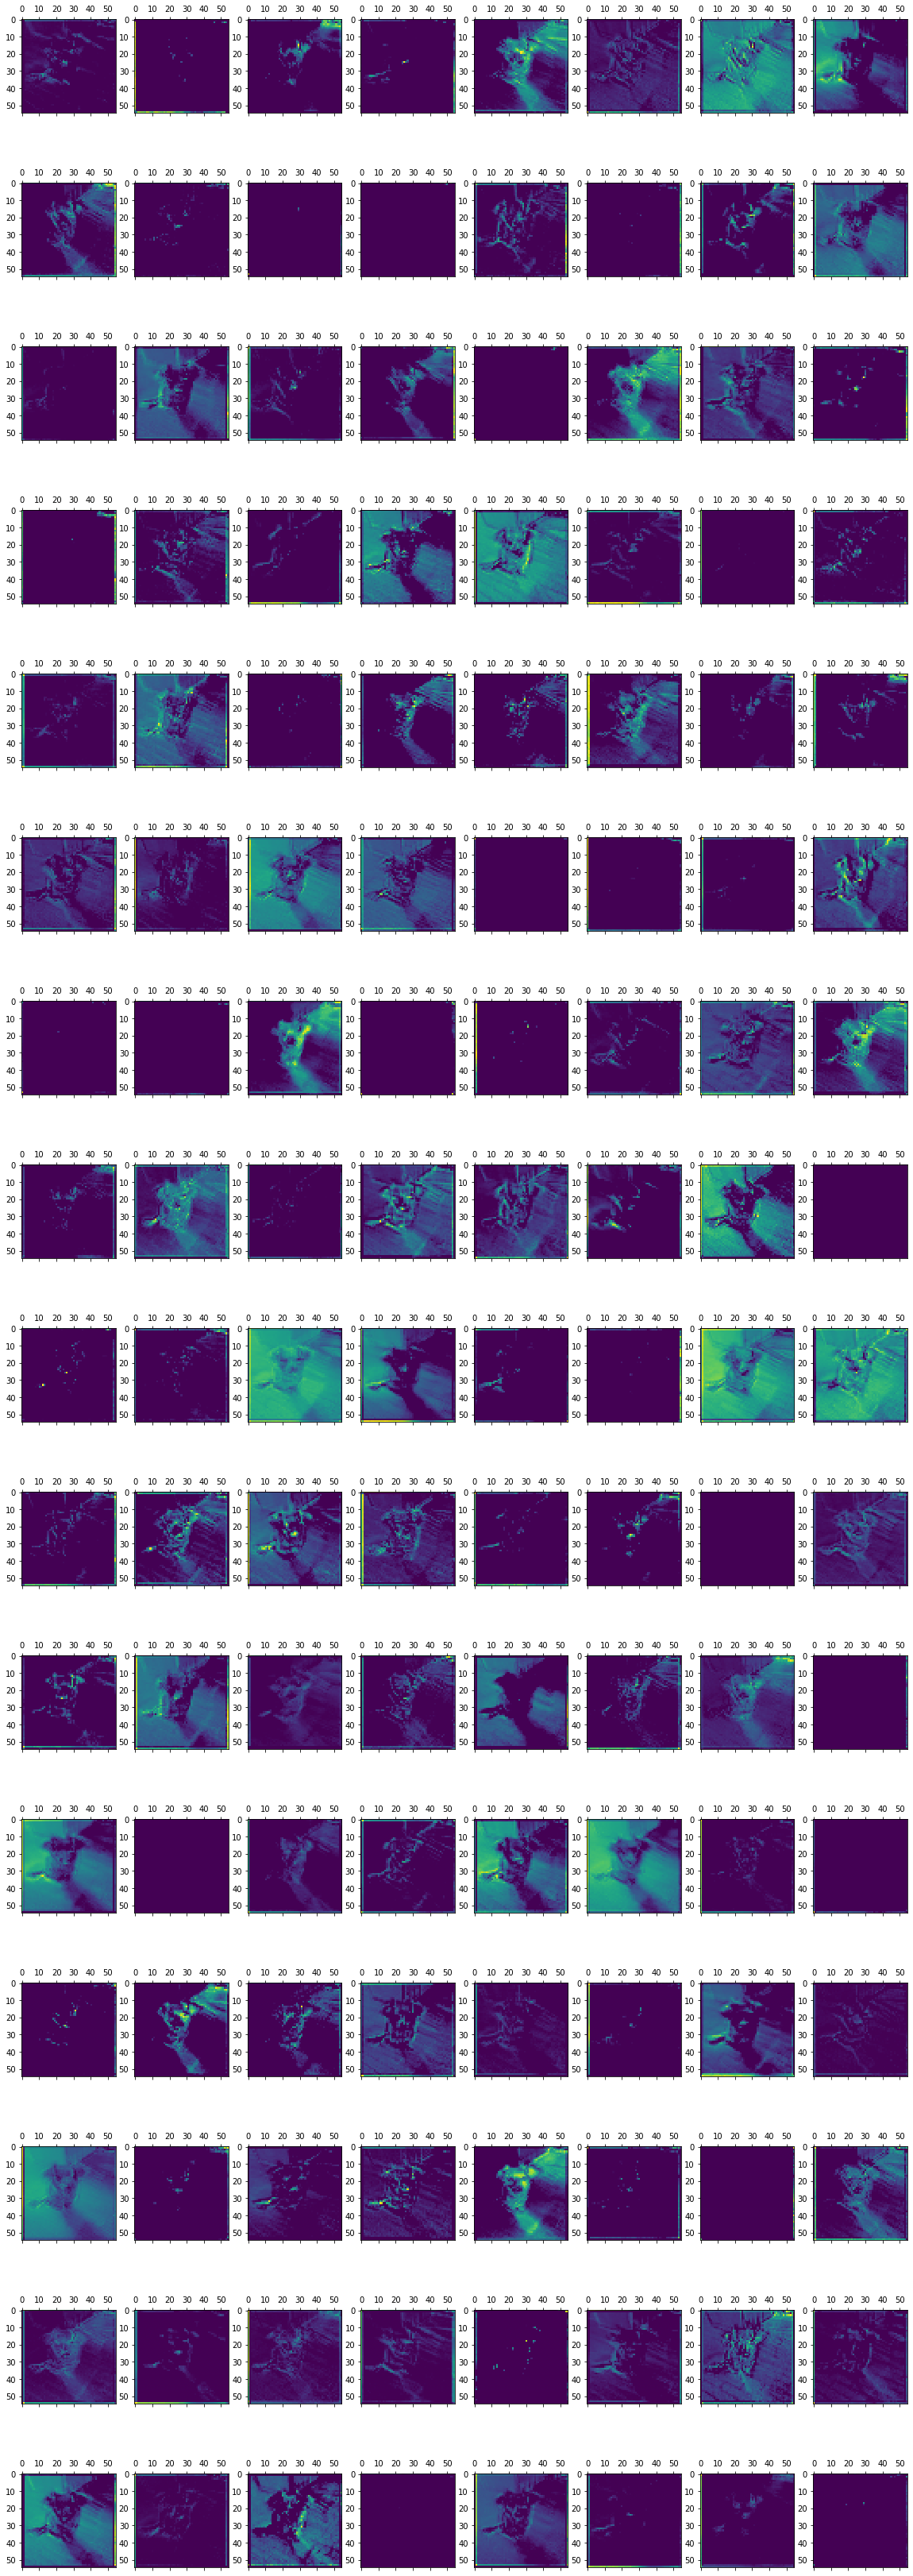

In [30]:
layer_out = activations[4]
fig = plt.figure(figsize=(20,60))
i=0
for i in range(128):
  subplot = fig.add_subplot(16,8,i+1)
  subplot.matshow(layer_out[0,:,:,i],cmap='viridis')
plt.show()